## 1.	Plot  a weighted directed network such that node size  and edge width is proportional to their degree and edge weight respectively

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.les_miserables_graph()
DG = G.to_directed()

In [3]:
max_weight = max(nx.get_edge_attributes(DG, 'weight').values())
for u, v in DG.edges():
    DG[u][v]['weight'] /= max_weight  # Normalize to [0, 1]

In [ ]:
# Calculate degrees for node sizing
degrees = dict(DG.degree())  # Includes in + out degree for directed graphs
max_degree = max(degrees.values())

In [16]:
# Node sizes proportional to degree
node_sizes = [500 + 2000 * (degrees[n] / max_degree) for n in DG.nodes()]

In [17]:
# Edge widths proportional to weight
edge_weights = [ 6 * DG[u][v]['weight'] for u, v in DG.edges()]


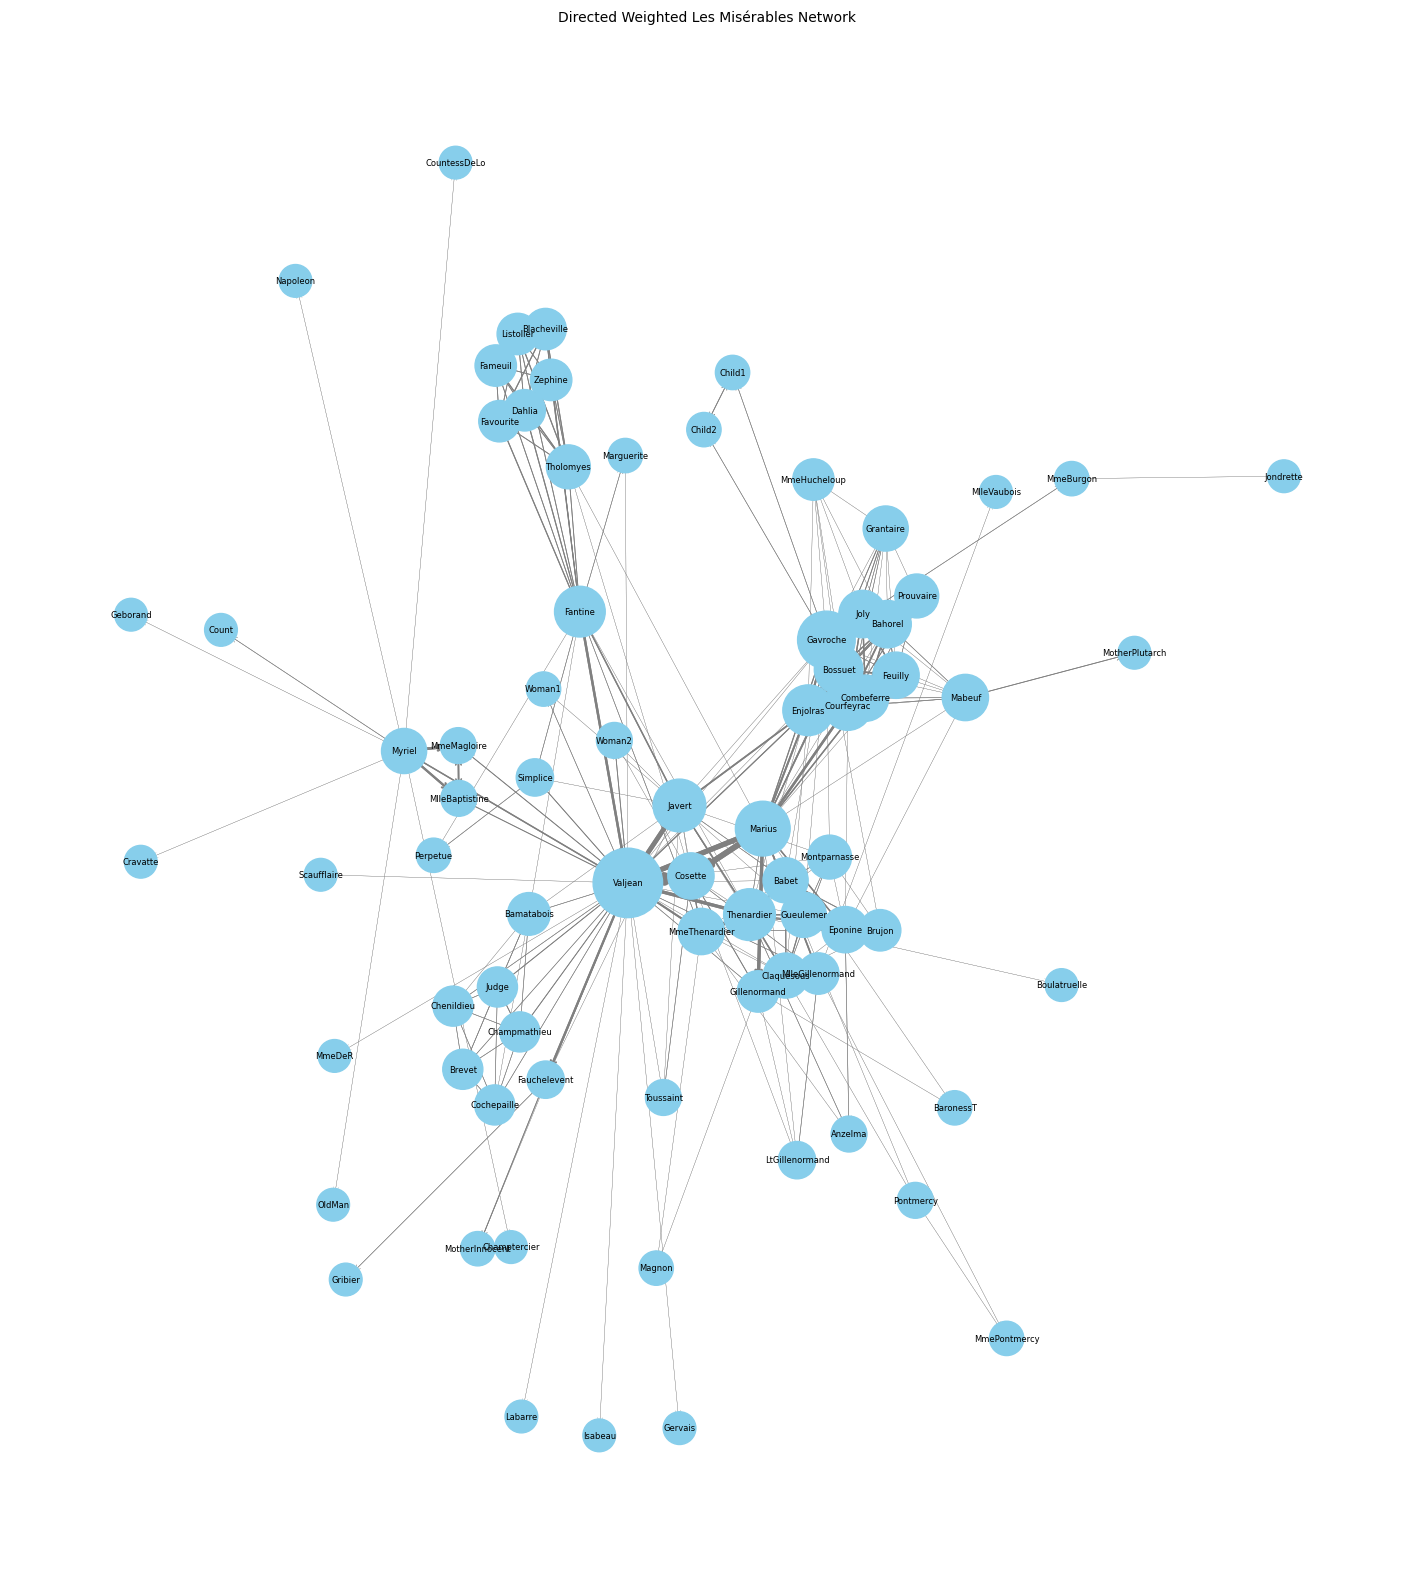

In [18]:
# Draw graph
pos = nx.spring_layout(DG, seed=42)
plt.figure(figsize=(18, 20))
nx.draw_networkx_nodes(DG, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(DG, pos, width=edge_weights, edge_color='gray', arrows=True, arrowstyle='->')
nx.draw_networkx_labels(DG, pos, font_size=6)

plt.title("Directed Weighted Les Misérables Network", fontsize=10)
plt.axis('off')
plt.show()